
# __Springboard Data Science Course__

## _Take Home Challenge_

##### _Ben Takacs_
###### Python verysion 3.10.04

---


## __Part 1: Exploratory data analysis__


## __Imports__

In [140]:
import pandas as pd
import numpy as np
import json
import os

import matplotlib.pyplot as plt
%matplotlib inline

## __Load Data__

In [141]:
f = open('logins.json') # open file
logins = json.load(f)['login_time'] # extract login times
f.close() # close file

In [142]:
df = pd.DataFrame()
df['logins'] = logins
df.logins = pd.to_datetime(logins, errors='raise')
df

,logins
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [143]:
df.isnull().sum()

logins    0
dtype: int64

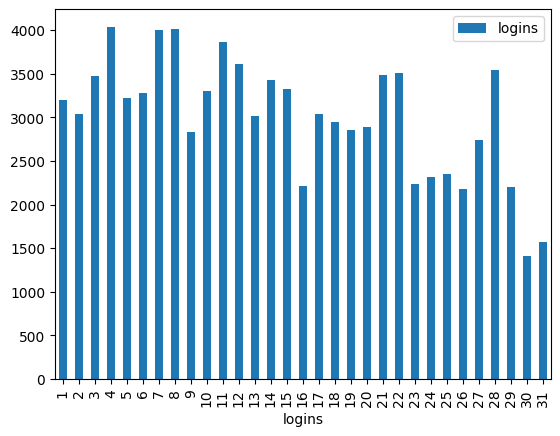

In [144]:
df.groupby(df.logins.dt.day).count().plot(kind="bar")
plt.show()

In [145]:
# Aggregate into 15 minutes
agg = df.groupby([pd.Grouper(key='logins', freq='15min')]).value_counts()
agg

logins
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
                      ..
1970-04-13 17:45:00    5
1970-04-13 18:00:00    5
1970-04-13 18:15:00    2
1970-04-13 18:30:00    7
1970-04-13 18:45:00    6
Name: count, Length: 9788, dtype: int64

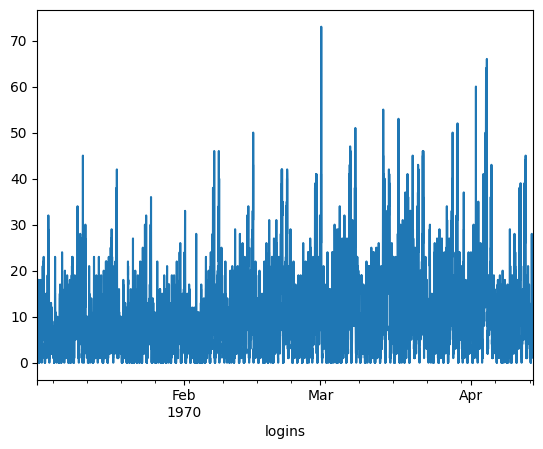

In [146]:
plt.plot()
agg.plot()
plt.show()

Frequency of logins over 1 day

In [147]:
agg[agg.index.time == pd.to_datetime("15:00").time()].sum()

780

In [148]:
group = agg.groupby(agg.index.time).sum()

In [149]:
group

00:00:00    1439
00:15:00    1547
00:30:00    1525
00:45:00    1482
01:00:00    1549
            ... 
22:45:00    1637
23:00:00    1573
23:15:00    1552
23:30:00    1456
23:45:00    1477
Name: count, Length: 96, dtype: int64

/var/folders/qj/vjvpkp3d3rq87m_14mc70r_00000gn/T/ipykernel_54591/3679347859.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  time = pd.to_datetime(group.index.astype(str))


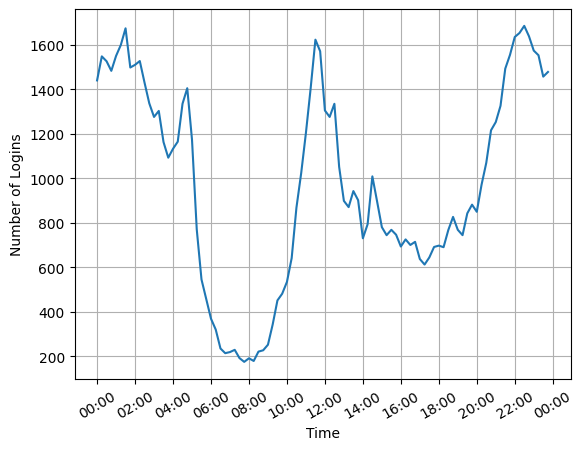

In [150]:
import matplotlib.dates as mdates
time = pd.to_datetime(group.index.astype(str))

plt.plot()
# group.plot()
plt.plot(time, group.values)
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Every 2 hours
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))  # Format as HH:MM
plt.xticks(rotation=30)
plt.xlabel('Time')
plt.ylabel('Number of Logins')
plt.grid(True)
plt.show()

From here we can see that the majority of logins occur about every 9 hours, starting around 2 AM, then 11 AM, then 10 PM. There is a huge drop of logins between about 5 AM and 11 AM, where it reaches one of three login peaks. Demand is high from midnight to 5 AM, and then again from for an hour from 11 AM to 1 PM, and again from 9 PM to midnight.


---

## __Part 2: Experiment and metrics design__


Info given: complementary circadian rythms, Gotham active weekday nights, Metro actie weekday days, both active weekends. Toll bridge between two, drivers tend to be city-exclusive. Propose experiment to encourage drivers to be available in both cities by reimbursing toll costs.

&emsp;


### 1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

>The key measure of success would be additional profits, making sure of two things:  
>1. that the new driver arrangement is more efficient than the previous in that more profit is generated  
>1.  that the cost of toll reimbursements is being covered and surpassed.


### 2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success

